# Multi-arm Bandits
## Feedback
**Evaluative Feedback**: 
- In it's pure form, depends only on the action taken
- Tells us how good was the action we took
- Doesn't tell us which action was best

**Instructive Feedback**:  
- In it's pure form, independent of the action taken
- Tells us which action was best to take
- Doesn't indicate how well our action (or any other for that matter) performed
- Used in its pure form for Supervised Learning


## K-armed Bandit

Faced with a choice of K different options / actions.  After each action, you receive an immidiate numerical reward (depends on the action).  
The objective is to Maximize the total reward over N time steps

$A_t$: Action selected at time $t$  
$R_t$: Reward for $A_t$  
$\large{q_*(a)}$: $\large{\mathbb{E}[R_t|A_t=a]}$    //The expected value of reward, given action $a$ is selected

So what is the problem?    We can just always choose the highest expected reward action!  
This is true! When we know $q*(a)$ we can be *greedy* and **exploit** this information and choose the most valueable action.  
BUT, In most situations we will not know what is $q*(a)$.  
Because we don't know what $q*(a)$ is, we will need to **explore** and increase our certainty about $q*(a)$ for different actions.  (Make $Q_t(a)$ as close to $q*(a)$ as possible)





## Action-Value Methods
This methods are used to evalate the true *value* of an action

### Method 1: *Sample Average*
The Value of an action is the mean reward from doing that action up to current time.  
We can easily formulate it to:
$\Large{Q_t(a) = \frac{\sum_{i=1}^{t-1}{R_i * \mathbb{1}_{A_i=a}}}{\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}}}}$  
$\mathbb{1}_{predicate}$ = 1 if true, else 0  

In this equation, $\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}} \rightarrow \infty$, $Q_t(a)$ $\rightarrow$ $q*(a)$  

We can couple this equation, with the selection method: $A_t=\underset{a}{\arg\max} {Q_t(a)}$ for a *greedy* selection process

#### $\large\epsilon-{greedy}$ Selection Method
Since we want to support **exploration** factor e for ~ $\epsilon$ of the times, we can set a rule so that:  
$A_t(e)= \{ \array{\underset{a}{\arg\max} {Q_t(a)} & with \ probability & 1-\epsilon \\ Random(a) & with \ probability & \epsilon } \}$  

In this case, we know that we **Explore** for $\epsilon$ of the time, and **Exploit** for $1-\epsilon$ of the time  

-----

**Exercise 2.1**: In $\epsilon$-greedy action selection, for the case of two actions and $\epsilon$ = 0.5, what is the probability that the greedy action is selected?  

**Answer**: The greedy action is selected $1-\epsilon$ of the times, so:  
$\epsilon=0.5 \| 1-\epsilon=0.5 \\ {Or} \\ $  
$\Pr(e|e\geq0.5) = 0.5 = 50\%$  

-----

## 10-armed Testbed

Total Reward: 37508.614486358616
arm 0:	 # chosen: 62	 mean: -32.76358435876929	 true: -32.81192515709784	 delta: 0.048340798328545986	 delta %: 0.001475442912448166

arm 3:	 # chosen: 141	 mean: 5.850265241150976	 true: 5.897574138180685	 delta: 0.04730889702970931	 delta %: 0.008086624294730616

arm 4:	 # chosen: 44	 mean: -8.714221468671825	 true: -8.868786233027498	 delta: 0.15456476435567268	 delta %: 0.017737070937586585

arm 1:	 # chosen: 55	 mean: 5.062385757301266	 true: 5.032864948365596	 delta: 0.029520808935670217	 delta %: 0.005831402494978488

arm 2:	 # chosen: 1698	 mean: 22.86222841317433	 true: 22.881049661229408	 delta: 0.018821248055079565	 delta %: 0.0008232464357775804



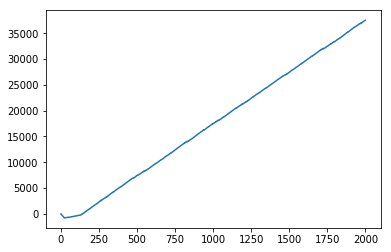

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class bandit_arm():
    def __init__(self, mean: float, std: float):
        self.mean = mean
        self.std = std
        self.distribution = np.random.normal
        
    def r(self):
        while True:
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit():
    def __init__(self, k: int, eps: float):
        self.A = self._create_arms(k)
        self.R = dict()
        self.epsilon = eps
        self.total_reward = 0
        self.cum_rewards = []
        
    def game(self, T: int):
        self.R = dict()
        self.total_reward = 0
        for i in range(T):
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm(np.random.normal(loc=0, scale=20), abs(np.random.normal(loc=0, scale=2))) for a in range(k)]
        
    def _Q(self, Ra: np.array):
        def _sample_average(Ra: np.array):
            mu = Ra.mean()
            return mu
    
        value_function = _sample_average
        return value_function(Ra)
    
    def _choose_action(self):
        r = np.random.uniform()
        if r > self.epsilon:
            Qt_with_indexes = [(b._Q(b.R[k]), k) for k in b.R.keys()]
            Qt = [r[0] for r in Qt_with_indexes]
            if Qt:
                chosen_arm =  np.argmax(Qt)
                chosen_arm = Qt_with_indexes[chosen_arm][1]
            else:
                chosen_arm = np.random.choice(range(len(self.A)))
        else:
            chosen_arm = np.random.choice(range(len(self.A)))
        return chosen_arm
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        c = self.R.setdefault(a, np.array([]))
        self.R[a] = np.append(self.R[a], Rt)
        return Rt

k = 5
epsilon = 0.1
b = bandit(k, epsilon)
T = 2000
total_reward = b.game(T)
cummulative = b.cum_rewards
plt.plot(cummulative)
print(f'Total Reward: {total_reward}')
for i in b.R:
    print(f'arm {i}:\t # chosen: {len(b.R[i])}\t mean: {np.mean(b.R[i])}\t true: {b.A[i].mean}\t delta: {abs(b.A[i].mean-np.mean(b.R[i]))}\t delta %: {abs(1-b.A[i].mean/np.mean(b.R[i]))}\n')

In [13]:
import pandas as pd

df = pd.DataFrame().from_dict(b.R)

ValueError: Invalid file path or buffer object type: <class 'dict'>